**The flow of the Notebook:**

1. Description of the Problem Statement.

2. International Airline Passengers prediction Dataset Loading.

3. Check The Dataset.

4. Visualize The Dataset

5. Split data into train and test

6. Apply TimeseriesGenerator to organize data into the right format

7. Build a Single LSTM model.

8. Train The Single LSTM model.

9. Make Prediction for Single LSTM model.

10. Calculate RMSE for Single LSTM model.

11. Forecasting and Visualization for Single LSTM model.

12. Build a Stacked LSTM model.

13. Train The Stacked LSTM model.

14. Make Prediction for Stacked LSTM model.

15. Calculate RMSE for Stacked LSTM model.

16. Forecasting and Visualization for Stacked LSTM model.

17. Build a Bidirectional LSTM model.

18. Train The Single LSTM model.

19. Make Prediction for Bidirectional LSTM model.

20. Calculate RMSE for Bidirectional LSTM model.

21. Forecasting and Visualization for Bidirectional LSTM model.

22. Build a Convolutional LSTM model.

23. Train The Convolutional LSTM model.

24. Make Prediction for Convolutional LSTM model.

25. Calculate RMSE for Convolutional LSTM model.

26. Forecasting and Visualization for Convolutional LSTM model.

**Problem Statement:**

International Airline Passengers prediction problem. This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Bidirectional, ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

**Load The Dataset**

In [2]:
# Load the dataset
data = read_csv('data/AirPassengers.csv', usecols=[1])

**Visualize The Dataset**

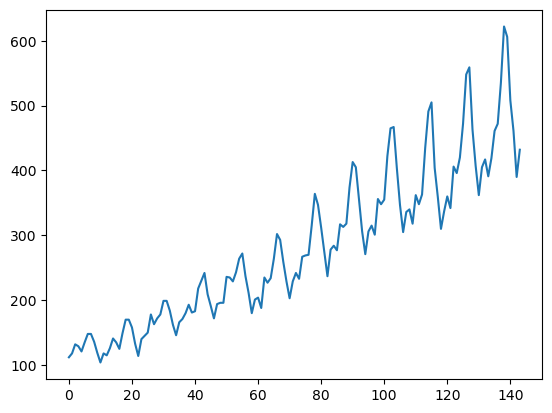

In [3]:
plt.plot(data)

In [59]:
# Convert pandas dataframe to numpy array
dataset = data.values
dataset = data.astype('float32')  # Convert values to float

In [60]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

**Split data into train and test**

In [61]:
# Split into train and test sets

train_size = int(len(dataset)*0.66)
test_size = len(dataset)-train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [62]:
# Create sequences for training and testing
def to_sequences(dataset,seq_size=1):
    x=[]
    y=[]
    
    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size),0]
        x.append(window)
        y.append(dataset[i+seq_size,0])
    return np.array(x),np.array(y)

In [63]:
# Define the sequence size
seq_size = 10

In [64]:
trainX, trainY = to_sequences(train,seq_size)
testX, testY = to_sequences(test,seq_size)

In [65]:
print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (84, 10)
Shape of test set: (38, 10)


**Build a Single LSTM model** 

In [11]:
print('Single LSTM with hidden Dense...')
# Define input layer
input_layer = Input(shape=(seq_size, 1))

# LSTM layer
lstm_layer = LSTM(64, input_shape=(None, seq_size))(input_layer)

# Hidden Dense layer
hidden_dense = Dense(32, activation='relu')(lstm_layer)

# Output Dense layer
output_layer = Dense(1)(hidden_dense)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

Single LSTM with hidden Dense...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


**Train Single LSTM Model**

In [12]:
# Train the model
model.fit(trainX, trainY, validation_data=(testX, testY), verbose=2, epochs=100)

Epoch 1/100
3/3 - 6s - loss: 0.0563 - val_loss: 0.2321 - 6s/epoch - 2s/step
Epoch 2/100
3/3 - 0s - loss: 0.0310 - val_loss: 0.1325 - 105ms/epoch - 35ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0142 - val_loss: 0.0630 - 61ms/epoch - 20ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0074 - val_loss: 0.0275 - 66ms/epoch - 22ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0076 - val_loss: 0.0216 - 61ms/epoch - 20ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0088 - val_loss: 0.0220 - 87ms/epoch - 29ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0067 - val_loss: 0.0271 - 75ms/epoch - 25ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0054 - val_loss: 0.0339 - 73ms/epoch - 24ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0058 - val_loss: 0.0343 - 69ms/epoch - 23ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0055 - val_loss: 0.0288 - 70ms/epoch - 23ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0048 - val_loss: 0.0229 - 75ms/epoch - 25ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0046 - val_loss: 0.0215 - 70ms/epoch - 23ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0047 - v

**Make prediction for Single LSTM model**

In [ ]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [14]:
# Invert predictions back to prescaled values
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

**Calculate RMSE for Single LSTM model**

In [16]:
# Calculate root mean squared error
trainScore = mean_squared_error(trainY[0], trainPredict[:, 0])
print('Train Score: %.2f RMSE' % (trainScore))

testScore = mean_squared_error(testY[0], testPredict[:, 0])
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 797.06 RMSE
Test Score: 3837.65 RMSE


**Forecasting and Visualization for Single LSTM model**

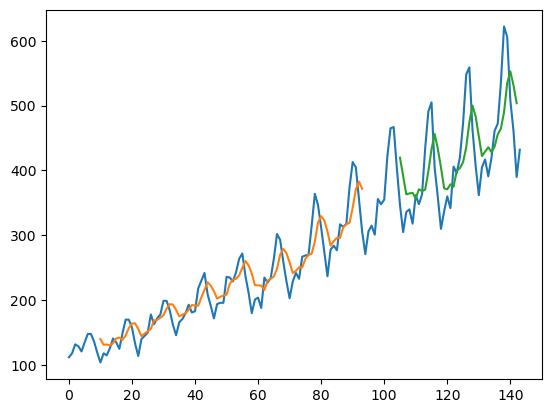

In [17]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict) + seq_size, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (seq_size * 2) + 1:len(dataset) - 1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

**Build Stacked LSTM with 1 hidden dense layer**

In [30]:
#Stacked LSTM with 1 hidden dense layer

# Define input layer
input_layer = Input(shape=(seq_size, 1))

# First LSTM layer with return_sequences=True to return sequences
lstm_layer1 = LSTM(50, activation='relu', return_sequences=True)(input_layer)

# Second LSTM layer
lstm_layer2 = LSTM(50, activation='relu')(lstm_layer1)

# Hidden Dense layer
hidden_dense = Dense(32, activation='relu')(lstm_layer2)

# Output Dense layer
output_layer = Dense(1)(hidden_dense)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_5 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 32)                1632      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 32,265
Trainable params: 32,265
Non-trainable params: 0
_________________________________________________________________


**Train Stacked LSTM model**

In [31]:
# Train the model
model.fit(trainX, trainY, validation_data=(testX, testY), verbose=2, epochs=100)

Epoch 1/100
3/3 - 5s - loss: 0.0691 - val_loss: 0.3775 - 5s/epoch - 2s/step
Epoch 2/100
3/3 - 0s - loss: 0.0605 - val_loss: 0.3435 - 95ms/epoch - 32ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0523 - val_loss: 0.3108 - 82ms/epoch - 27ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0446 - val_loss: 0.2760 - 80ms/epoch - 27ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0357 - val_loss: 0.2370 - 73ms/epoch - 24ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0275 - val_loss: 0.1922 - 84ms/epoch - 28ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0197 - val_loss: 0.1420 - 95ms/epoch - 32ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0136 - val_loss: 0.0907 - 92ms/epoch - 31ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0116 - val_loss: 0.0528 - 100ms/epoch - 33ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0136 - val_loss: 0.0417 - 98ms/epoch - 33ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0133 - val_loss: 0.0516 - 86ms/epoch - 29ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0112 - val_loss: 0.0672 - 75ms/epoch - 25ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0105 - v

**Make prediction for Stacked LSTM model**

In [32]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 6ms/step


In [33]:
# Invert predictions back to prescaled values
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

**Calculate RMSE for Stacked LSTM model**

In [36]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 32.47 RMSE
Test Score: 73.34 RMSE


**Forecasting and Visualization for Stacked LSTM model**

In [37]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict) + seq_size, :] = trainPredict

In [38]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (seq_size * 2) + 1:len(dataset) - 1, :] = testPredict

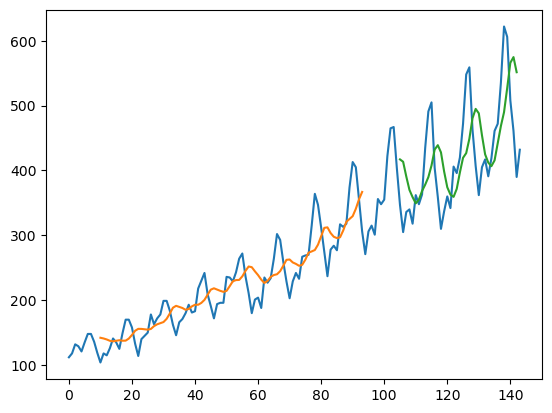

In [39]:
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Build Bidirectional LSTM Model**

In [50]:
# Define input layer
input_layer = Input(shape=(seq_size, 1))

# Bidirectional LSTM layer
bidirectional_lstm = Bidirectional(LSTM(50, activation='relu'))(input_layer)

# Output Dense layer
output_layer = Dense(1)(bidirectional_lstm)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              20800     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


**Train Bidirectional LSTM model**

In [51]:
# Train the model
model.fit(trainX, trainY, validation_data=(testX, testY), verbose=2, epochs=100)

Epoch 1/100
3/3 - 6s - loss: 0.0561 - val_loss: 0.2642 - 6s/epoch - 2s/step
Epoch 2/100
3/3 - 0s - loss: 0.0376 - val_loss: 0.1892 - 120ms/epoch - 40ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0237 - val_loss: 0.1231 - 67ms/epoch - 22ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0137 - val_loss: 0.0718 - 85ms/epoch - 28ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0079 - val_loss: 0.0395 - 82ms/epoch - 27ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0075 - val_loss: 0.0255 - 75ms/epoch - 25ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0088 - val_loss: 0.0229 - 88ms/epoch - 29ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0092 - val_loss: 0.0231 - 95ms/epoch - 32ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0081 - val_loss: 0.0251 - 80ms/epoch - 27ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0067 - val_loss: 0.0290 - 82ms/epoch - 27ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0062 - val_loss: 0.0338 - 84ms/epoch - 28ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0059 - val_loss: 0.0365 - 79ms/epoch - 26ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0060 - v

**Make prediction for Bidirectional LSTM model**

In [52]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 7ms/step


In [53]:
# Invert predictions back to prescaled values
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

**Calculate RMSE for  Bidirectional LSTM model**

In [54]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 28.72 RMSE
Test Score: 68.73 RMSE


**Forecasting and Visualization for Bidirectional LSTM model**

In [55]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict) + seq_size, :] = trainPredict

In [56]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (seq_size * 2) + 1:len(dataset) - 1, :] = testPredict

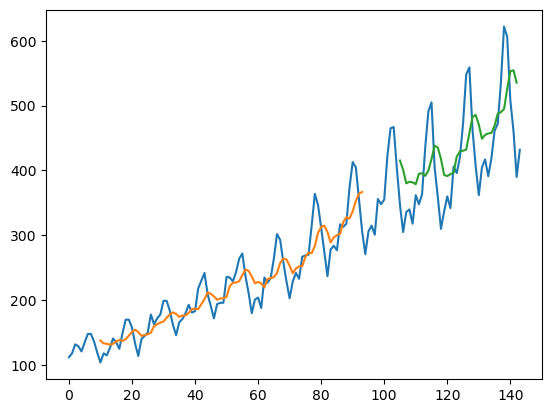

In [57]:
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [68]:
# Reshape input for ConvLSTM
trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

**Build Convolutional LSTM Model**

In [69]:
# Define input layer
input_layer = Input(shape=(1, 1, 1, seq_size))

# ConvLSTM layer
conv_lstm = ConvLSTM2D(filters=64, kernel_size=(1, 1), activation='relu')(input_layer)

# Flatten layer
flatten_layer = Flatten()(conv_lstm)

# Dense layers
dense_layer1 = Dense(32)(flatten_layer)
output_layer = Dense(1)(dense_layer1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1, 1, 1, 10)]     0         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 1, 1, 64)          19200     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________


**Train Convolutional LSTM Model**

In [70]:
model.fit(trainX, trainY, validation_data=(testX, testY), verbose=2, epochs=100)

Epoch 1/100
3/3 - 7s - loss: 0.0660 - val_loss: 0.3301 - 7s/epoch - 2s/step
Epoch 2/100
3/3 - 1s - loss: 0.0483 - val_loss: 0.2594 - 507ms/epoch - 169ms/step
Epoch 3/100
3/3 - 1s - loss: 0.0335 - val_loss: 0.1953 - 512ms/epoch - 171ms/step
Epoch 4/100
3/3 - 1s - loss: 0.0218 - val_loss: 0.1378 - 506ms/epoch - 169ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0140 - val_loss: 0.0901 - 490ms/epoch - 163ms/step
Epoch 6/100
3/3 - 1s - loss: 0.0093 - val_loss: 0.0559 - 540ms/epoch - 180ms/step
Epoch 7/100
3/3 - 1s - loss: 0.0092 - val_loss: 0.0352 - 524ms/epoch - 175ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0101 - val_loss: 0.0270 - 496ms/epoch - 165ms/step
Epoch 9/100
3/3 - 1s - loss: 0.0108 - val_loss: 0.0254 - 502ms/epoch - 167ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0104 - val_loss: 0.0273 - 497ms/epoch - 166ms/step
Epoch 11/100
3/3 - 1s - loss: 0.0092 - val_loss: 0.0312 - 504ms/epoch - 168ms/step
Epoch 12/100
3/3 - 1s - loss: 0.0079 - val_loss: 0.0368 - 537ms/epoch - 179ms/step
Epoch 13/100
3/3 - 

Epoch 100/100
3/3 - 1s - loss: 0.0016 - val_loss: 0.0090 - 526ms/epoch - 175ms/step


**Make prediction for Convolutional LSTM Model**

In [71]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 8ms/step


In [72]:
# Invert predictions back to prescaled values
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

**Calculate RMSE for Convolutional LSTM Model**

In [73]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.29 RMSE
Test Score: 49.12 RMSE


**Forecasting and Visualization for Convolutional LSTM Model**

In [74]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict) + seq_size, :] = trainPredict

In [75]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (seq_size * 2) + 1:len(dataset) - 1, :] = testPredict

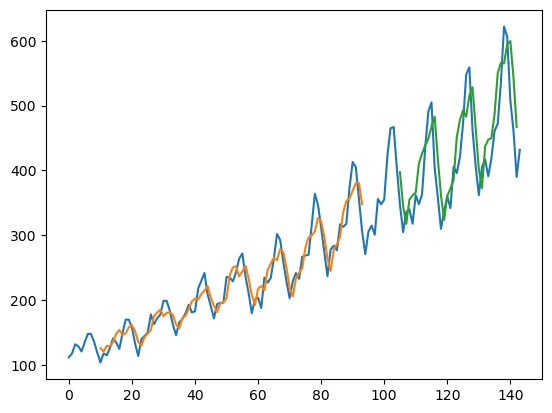

In [76]:
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()